# ÇALIŞAN AYRILMA DURUMU ANALİZİ

# Modüller

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, silhouette_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from yellowbrick.cluster import KElbowVisualizer
import pickle
import warnings
warnings.filterwarnings("ignore")

### Veriyi Yükleme

In [199]:
df = pd.read_csv("HR_Dataset.csv")

In [200]:
df.shape

(14999, 10)

In [258]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [202]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [203]:
df.groupby("left").describe().T

left                                    0            1
satisfaction_level    count  11428.000000  3571.000000
                      mean       0.666810     0.440098
                      std        0.217104     0.263933
                      min        0.120000     0.090000
                      25%        0.540000     0.130000
                      50%        0.690000     0.410000
                      75%        0.840000     0.730000
                      max        1.000000     0.920000
last_evaluation       count  11428.000000  3571.000000
                      mean       0.715473     0.718113
                      std        0.162005     0.197673
                      min        0.360000     0.450000
                      25%        0.580000     0.520000
                      50%        0.710000     0.790000
                      75%        0.850000     0.900000
                      max        1.000000     1.000000
number_project        count  11428.000000  3571.000000
                      mean       3.786664     3.855503
                      std        0.979884     1.818165
                      min        2.000000     2.000000
                      25%        3.000000     2.000000
                      50%        4.000000     4.000000
                      75%        4.000000     6.000000
                      max        6.000000     7.000000
average_montly_hours  count  11428.000000  3571.000000
                      mean     199.060203   207.419210
                      std       45.682731    61.202825
                      min       96.000000   126.000000
                      25%      162.000000   146.000000
                      50%      198.000000   224.000000
                      75%      238.000000   262.000000
                      max      287.000000   310.000000
time_spend_company    count  11428.000000  3571.000000
                      mean       3.380032     3.876505
                      std        1.562348     0.977698
                      min        2.000000     2.000000
                      25%        2.000000     3.000000
                      50%        3.000000     4.000000
                      75%        4.000000     5.000000
                      max       10.000000     6.000000
Work_accident         count  11428.000000  3571.000000
                      mean       0.175009     0.047326
                      std        0.379991     0.212364
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000
promotion_last_5years count  11428.000000  3571.000000
                      mean       0.026251     0.005321
                      std        0.159889     0.072759
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000

In [204]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:>

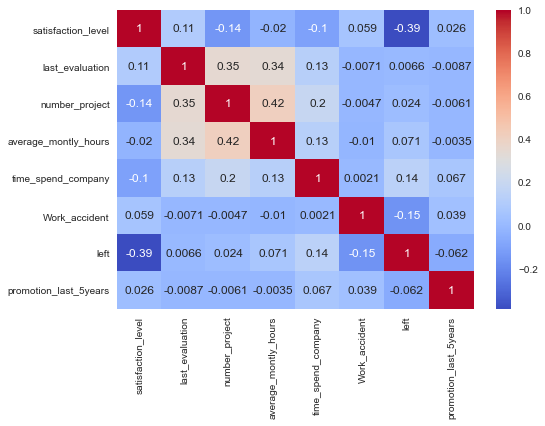

In [205]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

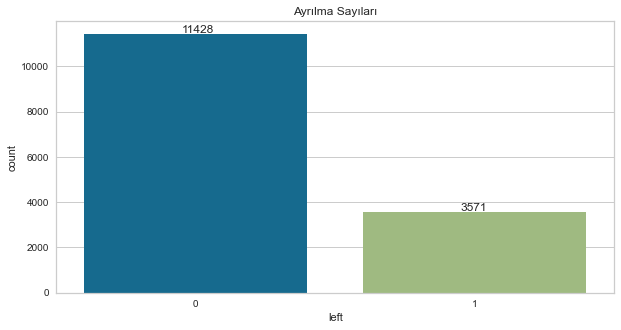

In [206]:
plt.figure(figsize=(10,5))
ax = sns.countplot("left", data=df)
plt.title('Ayrılma Sayıları')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))

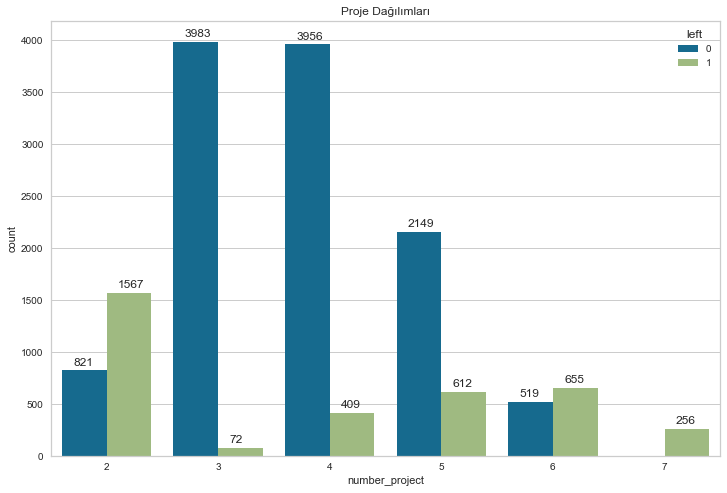

In [207]:
plt.figure(figsize=(12,8))
ax = sns.countplot("number_project", hue="left", data=df)
plt.title('Proje Dağılımları')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

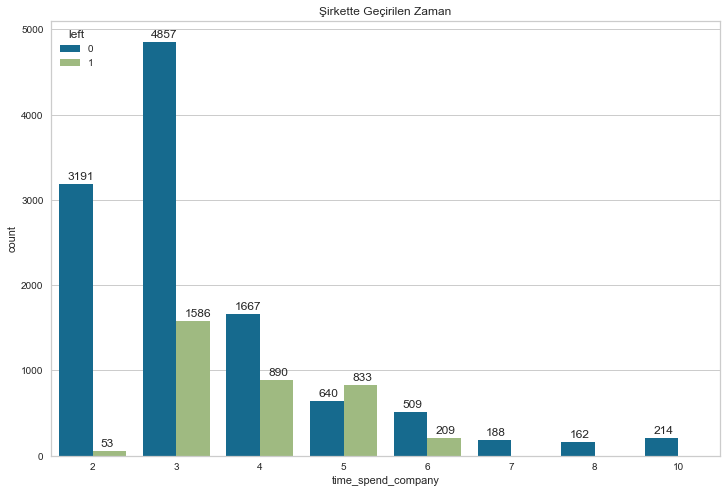

In [208]:
plt.figure(figsize=(12,8))
ax = sns.countplot("time_spend_company", hue="left", data=df)
plt.title('Şirkette Geçirilen Zaman')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

5 yıldan fazla çalışanlar kalma eğilimindeler.

Text(0.5, 1.0, 'Memnuniyet')

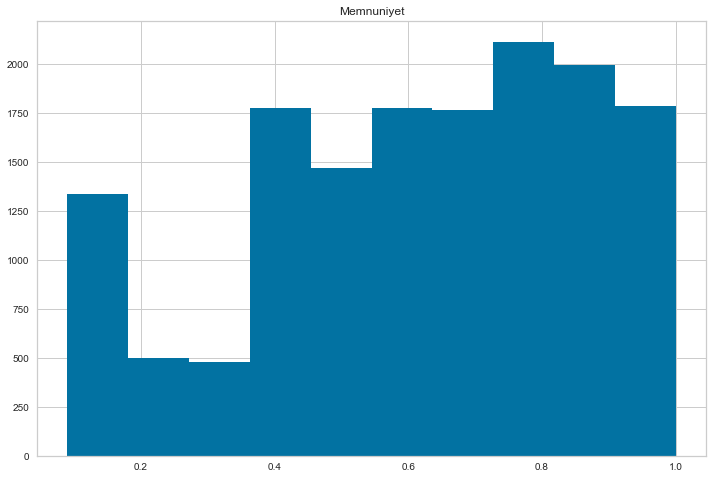

In [209]:
plt.figure(figsize=(12,8))
ax = plt.hist("satisfaction_level", data=df)
plt.title('Memnuniyet')

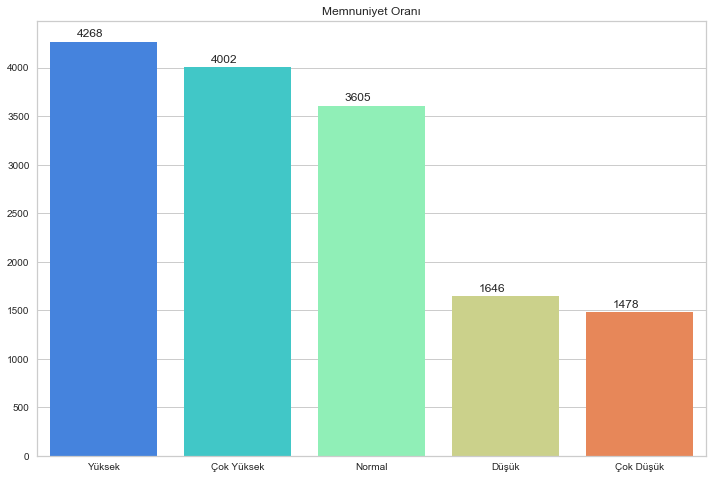

In [210]:
def memnuniyet(x):
       
    if x <= 0.20:
        return "Çok Düşük"
    elif x <= 0.40:
        return "Düşük"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "Yüksek"
    else:
        return "Çok Yüksek"
    
df["memnuniyet"] = df["satisfaction_level"].apply(memnuniyet)

plt.figure(figsize=(12,8))
plt.title("Memnuniyet Oranı")
ax = sns.barplot(x=df["memnuniyet"].value_counts().index, y=df["memnuniyet"].value_counts().values, palette="rainbow")

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

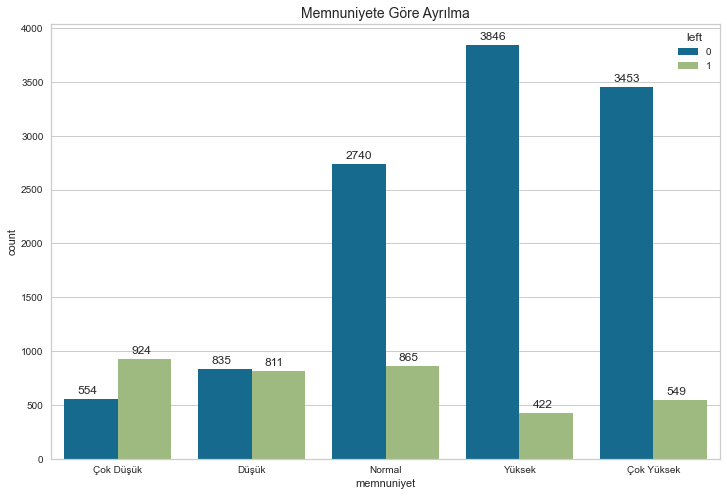

In [211]:
plt.figure(figsize=(12, 8))

plt.title("Memnuniyete Göre Ayrılma", size=14)
ax = sns.countplot(x="memnuniyet", hue="left", data=df, order=["Çok Düşük", "Düşük", "Normal", "Yüksek", "Çok Yüksek"])

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [212]:
df.drop(["memnuniyet"], axis=1, inplace=True)

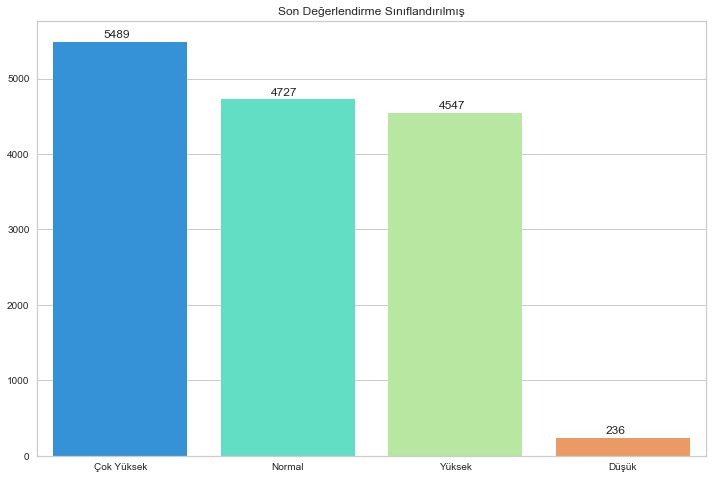

In [213]:
def evaluation(x):
        
    if x <= 0.20:
        return "Çok Düşük"
    elif x <= 0.40:
        return "Düşük"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "Yüksek"
    else:
        return "Çok Yüksek"
    
df["son_değerlendirme"] = df["last_evaluation"].apply(evaluation)

plt.figure(figsize=(12,8))
plt.title("Son Değerlendirme Sınıflandırılmış")
ax = sns.barplot(x=df["son_değerlendirme"].value_counts().index, y=df["son_değerlendirme"].value_counts().values, palette="rainbow")

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

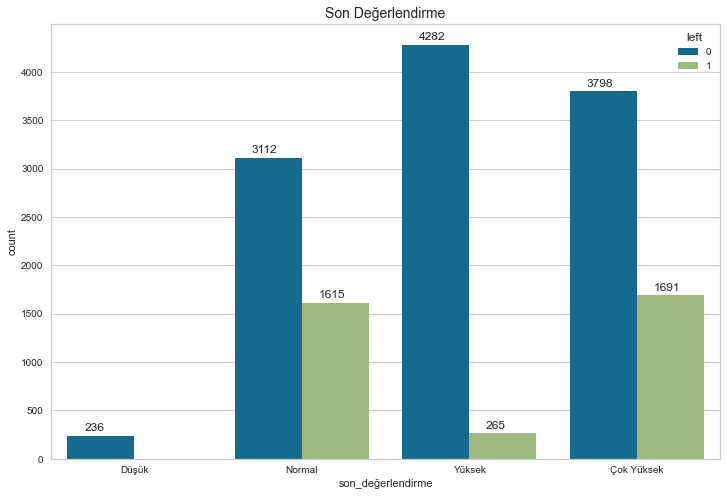

In [214]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="son_değerlendirme", hue="left", data=df, order=["Düşük", "Normal", "Yüksek", "Çok Yüksek"])
plt.title("Son Değerlendirme", size=14)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [215]:
df.drop(["son_değerlendirme"], axis=1, inplace=True)

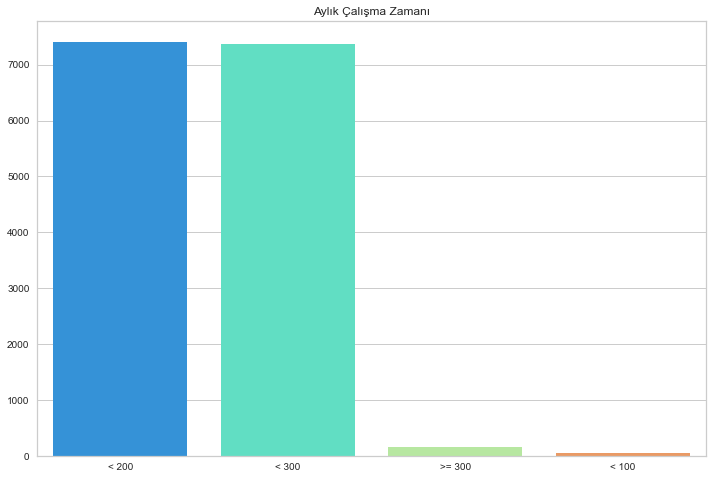

In [216]:
def aylık_saat(x):
        
    if x < 100:
        return "< 100"
    elif x < 200:
        return "< 200"
    elif x <= 300:
        return "< 300"
    elif x >= 300:
        return ">= 300"
    
df["aylık_saat"] = df["average_montly_hours"].apply(aylık_saat)

plt.figure(figsize=(12,8))
plt.title("Aylık Çalışma Zamanı")

sns.barplot(x=df["aylık_saat"].value_counts().index, y=df["aylık_saat"].value_counts().values, palette="rainbow")
plt.show()

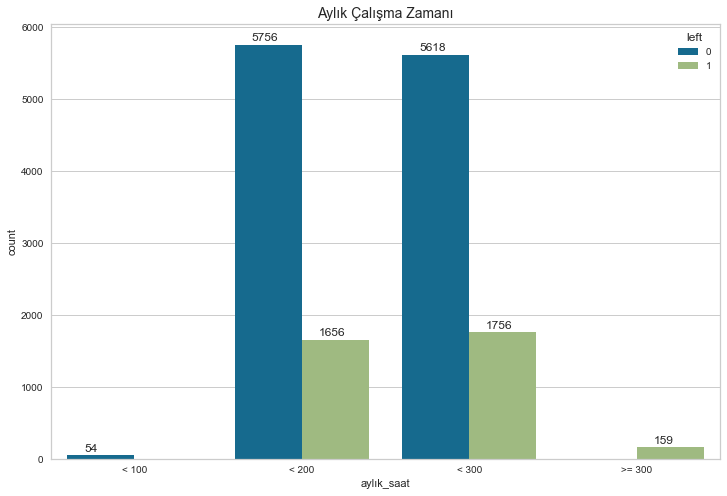

In [217]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="aylık_saat", hue="left", data=df, order=["< 100", "< 200", "< 300", ">= 300"])
plt.title("Aylık Çalışma Zamanı", size=14)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [218]:
df.drop(["aylık_saat"], axis=1, inplace=True)

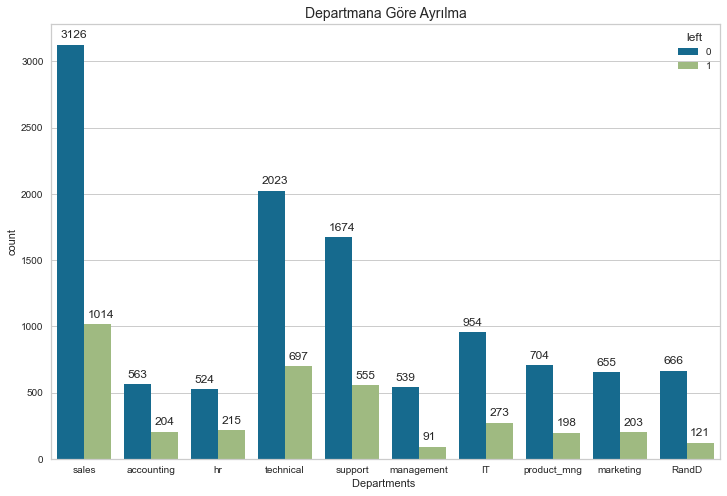

In [219]:
plt.figure(figsize=(12, 8))
plt.title("Departmana Göre Ayrılma", size=14)
ax = sns.countplot(x="Departments ", hue="left", data=df)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))

In [220]:
df.groupby("Departments ")["left"].value_counts(normalize=True)

Departments   left
IT            0       0.777506
              1       0.222494
RandD         0       0.846252
              1       0.153748
accounting    0       0.734029
              1       0.265971
hr            0       0.709066
              1       0.290934
management    0       0.855556
              1       0.144444
marketing     0       0.763403
              1       0.236597
product_mng   0       0.780488
              1       0.219512
sales         0       0.755072
              1       0.244928
support       0       0.751009
              1       0.248991
technical     0       0.743750
              1       0.256250
Name: left, dtype: float64

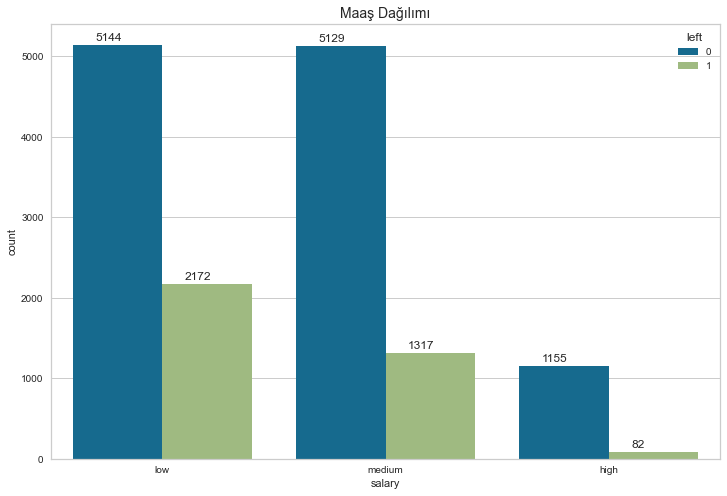

In [221]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="salary", hue="left", data=df)
plt.title("Maaş Dağılımı", size=14)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

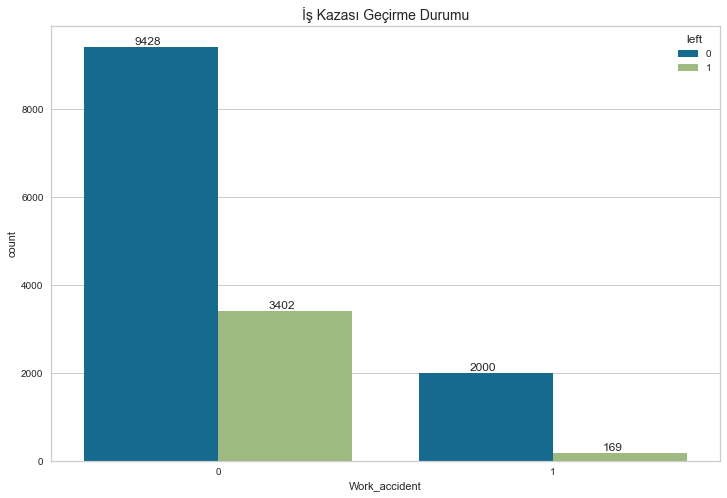

In [222]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Work_accident", hue="left", data=df)
plt.title("İş Kazası Geçirme Durumu", size=14)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

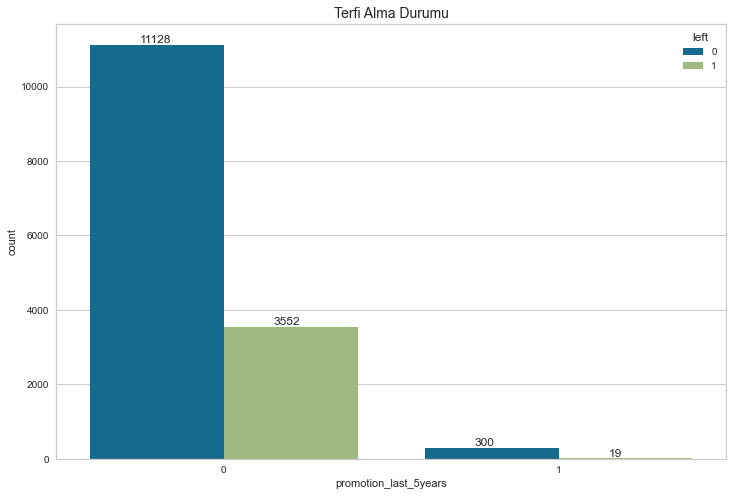

In [223]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df)
plt.title("Terfi Alma Durumu", size=14)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

# Veri İşleme

In [224]:
X = df.drop(["left", "Departments ", "salary"], axis=1)
y = df["left"]

In [225]:
scale = StandardScaler()
sc = scale.fit_transform(X)
X = pd.DataFrame(sc, columns=X.columns)
X = X.join(pd.get_dummies(df["Departments "]))
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0,0,0,0,0,0,0,1,0,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0,0,0,0,0,0,0,1,0,0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0,0,0,0,0,0,0,1,0,0
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0,0,0,0,0,0,0,1,0,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0,0,0,0,0,0,0,1,0,0


In [226]:
X['salary'] = df['salary'].apply(lambda x: ['low', 'medium', 'high'].index(x))

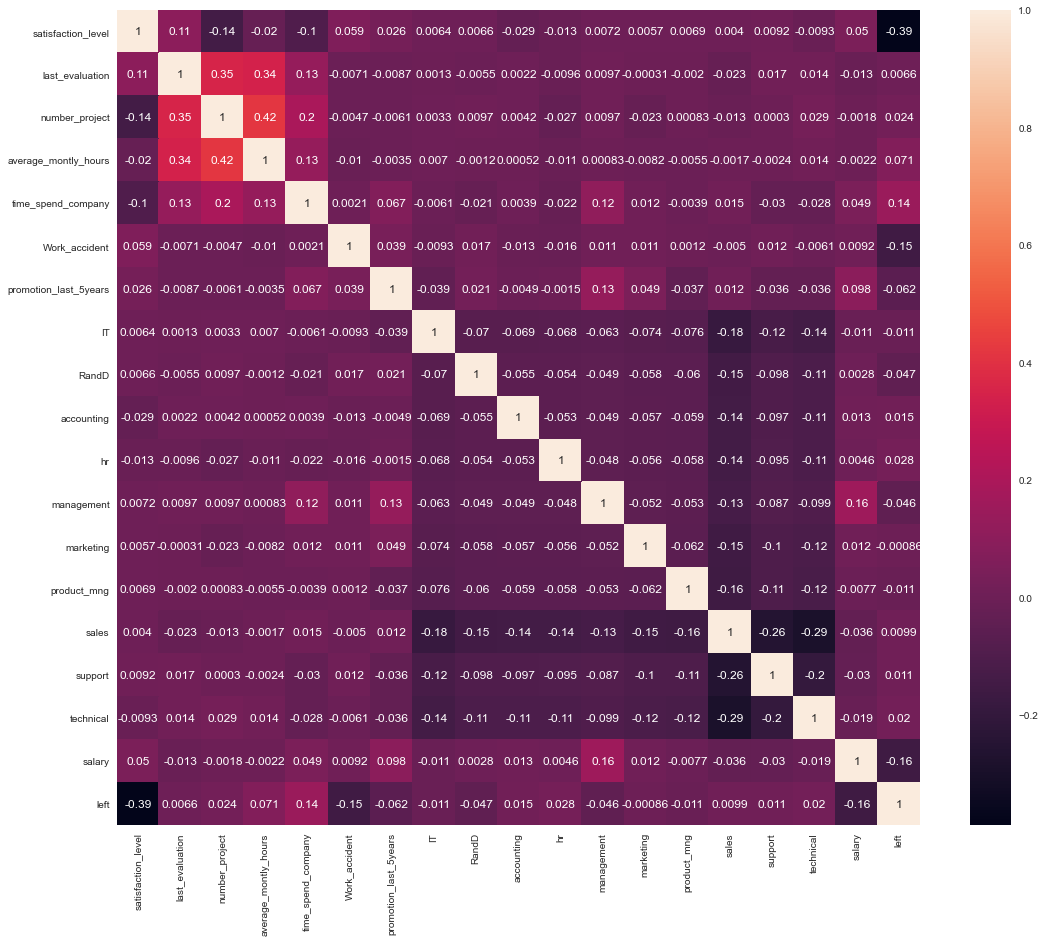

In [227]:
plt.figure(figsize=(18,15))
sns.heatmap(X.join(y).corr(), annot=True);

## Model

In [228]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## LOGISTIC REGRESSION

In [229]:
log_model = LogisticRegression()
log_model.fit(X_egitim, y_egitim)
y_tahmin = log_model.predict(X_test)
confusion_matrix(y_test, y_tahmin)

array([[2118,  176],
       [ 457,  249]], dtype=int64)

In [230]:
print(classification_report(y_test, y_tahmin))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.59      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



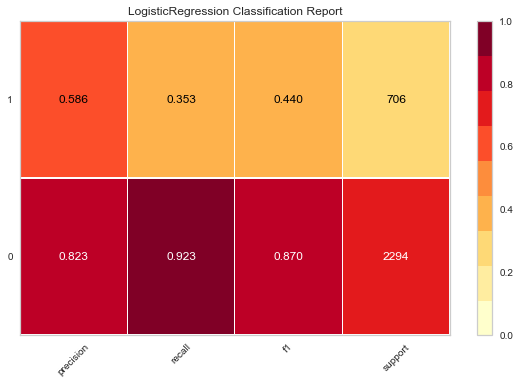

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [231]:
visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

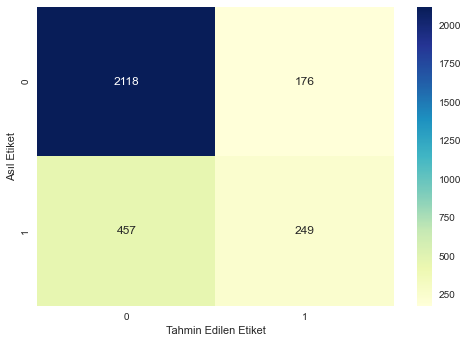

In [232]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

## KNN

In [233]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [234]:
olcek = StandardScaler()
X_egitim = olcek.fit_transform(X_egitim)
X_test = olcek.transform(X_test)
keyk_model = KNeighborsClassifier()
keyk_model.fit(X_egitim, y_egitim)

KNeighborsClassifier()

In [235]:
y_tahmin = keyk_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[2195   99]
 [  72  634]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2294
           1       0.86      0.90      0.88       706

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



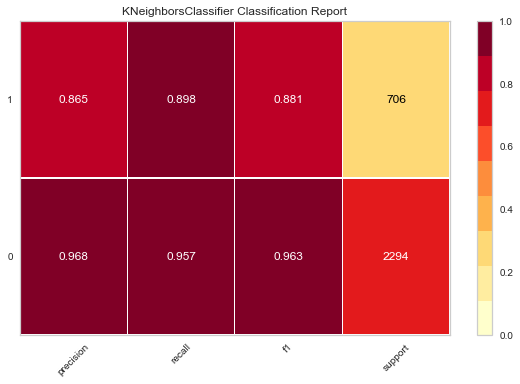

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [236]:
visualizer = ClassificationReport(keyk_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

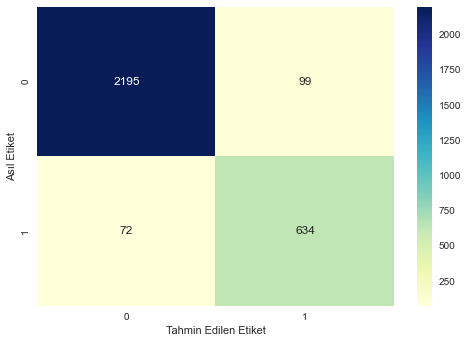

In [237]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

## SVM

In [238]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [239]:
svm_model = SVC().fit(X_egitim, y_egitim)

In [240]:
y_tahmin = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[2245   49]
 [  74  632]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.93      0.90      0.91       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



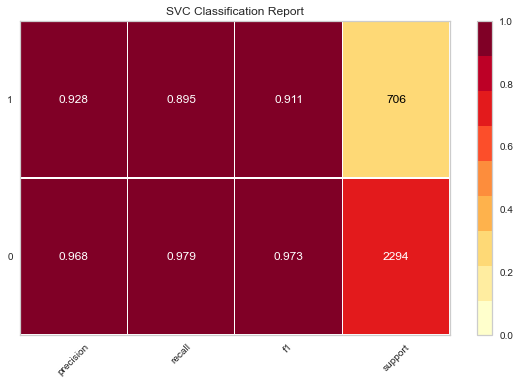

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [241]:
visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

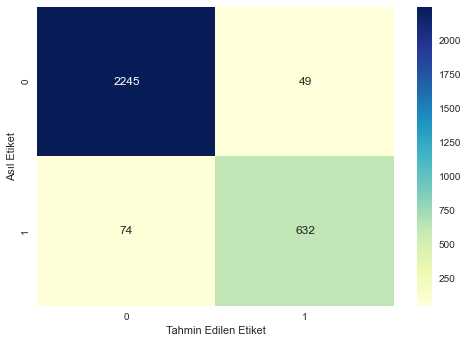

In [242]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

## Decision Tree

In [243]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [244]:
agac_model = DecisionTreeClassifier()
agac_model.fit(X_egitim, y_egitim)

DecisionTreeClassifier()

In [245]:
y_tahmin = agac_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[2234   52]
 [  24  690]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.97      0.95       714

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000



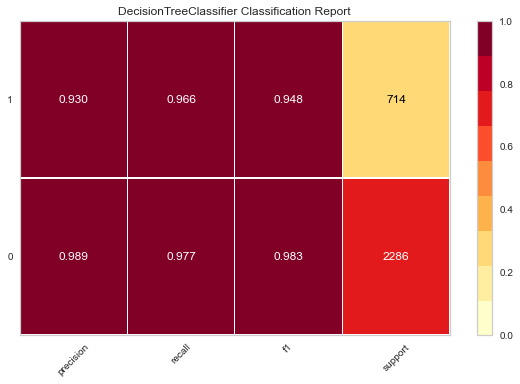

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [246]:
visualizer = ClassificationReport(agac_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

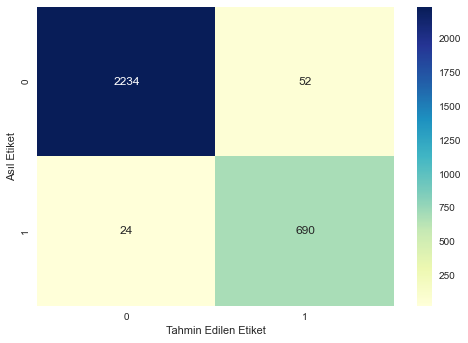

In [247]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

## Random Forest

In [259]:
orman_model = RandomForestClassifier()
orman_model.fit(X_egitim, y_egitim)

RandomForestClassifier()

In [260]:
y_tahmin = orman_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[2285    9]
 [  25  681]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



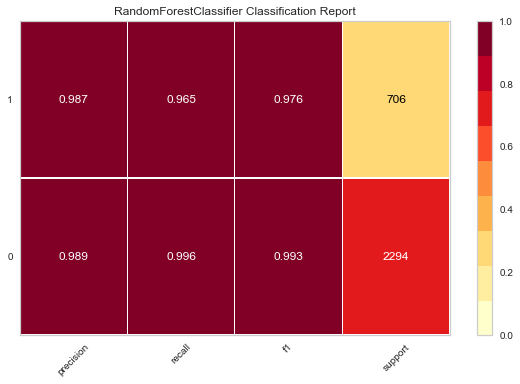

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [261]:
visualizer = ClassificationReport(orman_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

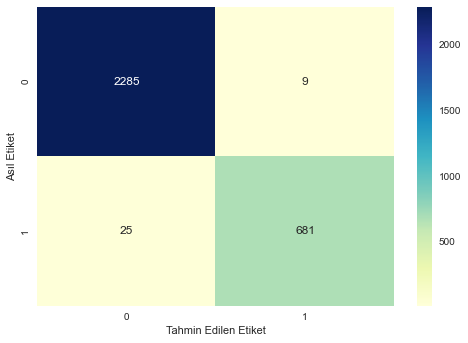

In [262]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

## Xgboost

In [252]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [253]:
xgb_model = XGBClassifier()
xgb_model.fit(X_egitim, y_egitim)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
y_tahmin = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[2282   12]
 [  26  680]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



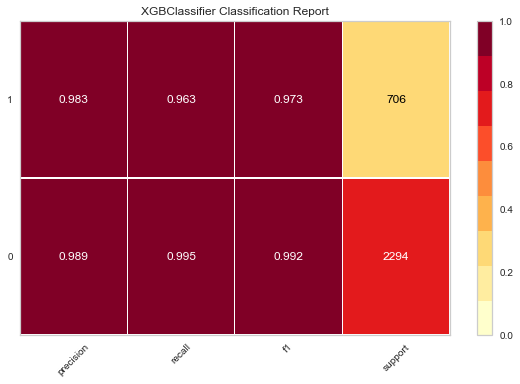

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [255]:
visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_egitim, y_egitim)        
visualizer.score(X_test, y_test)        
visualizer.show()

Text(0.5, 29.5, 'Tahmin Edilen Etiket')

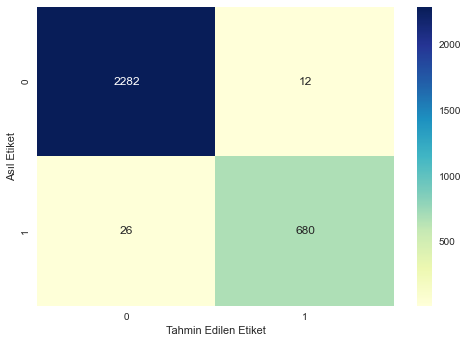

In [256]:
cnf_matrix = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Asıl Etiket')
plt.xlabel('Tahmin Edilen Etiket')

### Save and Export the Model as .pkl

In [191]:
pickle.dump(orman_model, open("orman_model.pkl", "wb"))

### Save and Export Variables as .pkl

In [192]:
pickle.dump(scale, open("scaler.pkl", "wb"))